In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Clean and prepare dataframe for EDA

In [53]:
stroke = pd.read_csv('healthcare-dataset-stroke-data.csv')
stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [54]:
stroke.drop('id',axis=1,inplace=True)
stroke.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [55]:
#setup numerical values of 1,0 for categorical variables
stroke['ever_married'] = stroke['ever_married'].map({'Yes':1, 'No':0})
stroke['Residence_type'] = stroke['Residence_type'].map({'Urban':1, 'Rural':0})

In [56]:
stroke.isnull().any()

gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                   True
smoking_status       False
stroke               False
dtype: bool

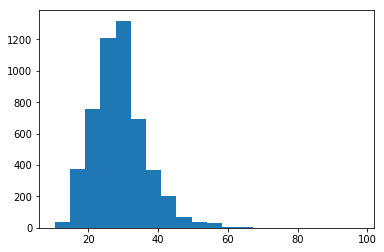

(28.1, 28.862035225049)

In [191]:
#check to see the distribution of BMI before filling values 
plt.hist(stroke['bmi'],bins= 20)
plt.show()
stroke['bmi'].median(),stroke['bmi'].mean()

In [58]:
#create dummy variables for our multivariable categorical columns
gender_temp = pd.get_dummies(stroke['gender'])
stroke = pd.concat([stroke,gender_temp],axis=1)
stroke.drop('gender',axis=1,inplace=True)

temp = pd.get_dummies(stroke['work_type'])
stroke = pd.concat([stroke,temp],axis=1)
stroke.drop('work_type',axis=1,inplace=True)

temp = pd.get_dummies(stroke['smoking_status'])
stroke = pd.concat([stroke,temp],axis=1)
stroke.drop('smoking_status',axis=1,inplace=True)

In [59]:
stroke.head()

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,Female,Male,Other,Govt_job,Never_worked,Private,Self-employed,children,Unknown,formerly smoked,never smoked,smokes
0,67.0,0,1,1,1,228.69,36.6,1,0,1,0,0,0,1,0,0,0,1,0,0
1,61.0,0,0,1,0,202.21,NaN,1,1,0,0,0,0,0,1,0,0,0,1,0
2,80.0,0,1,1,0,105.92,32.5,1,0,1,0,0,0,1,0,0,0,0,1,0
3,49.0,0,0,1,1,171.23,34.4,1,1,0,0,0,0,1,0,0,0,0,0,1
4,79.0,1,0,1,0,174.12,24.0,1,1,0,0,0,0,0,1,0,0,0,1,0


In [60]:
from sklearn.impute import SimpleImputer
#impute the empty values of bmi with the median as it better represents the population
imputer = SimpleImputer(strategy='median')
col = stroke.columns
stroke = imputer.fit_transform(stroke)
stroke = pd.DataFrame(stroke,columns=col)

In [61]:
stroke.isnull().any()

age                  False
hypertension         False
heart_disease        False
ever_married         False
Residence_type       False
avg_glucose_level    False
bmi                  False
stroke               False
Female               False
Male                 False
Other                False
Govt_job             False
Never_worked         False
Private              False
Self-employed        False
children             False
Unknown              False
formerly smoked      False
never smoked         False
smokes               False
dtype: bool

#### Conduct EDA 

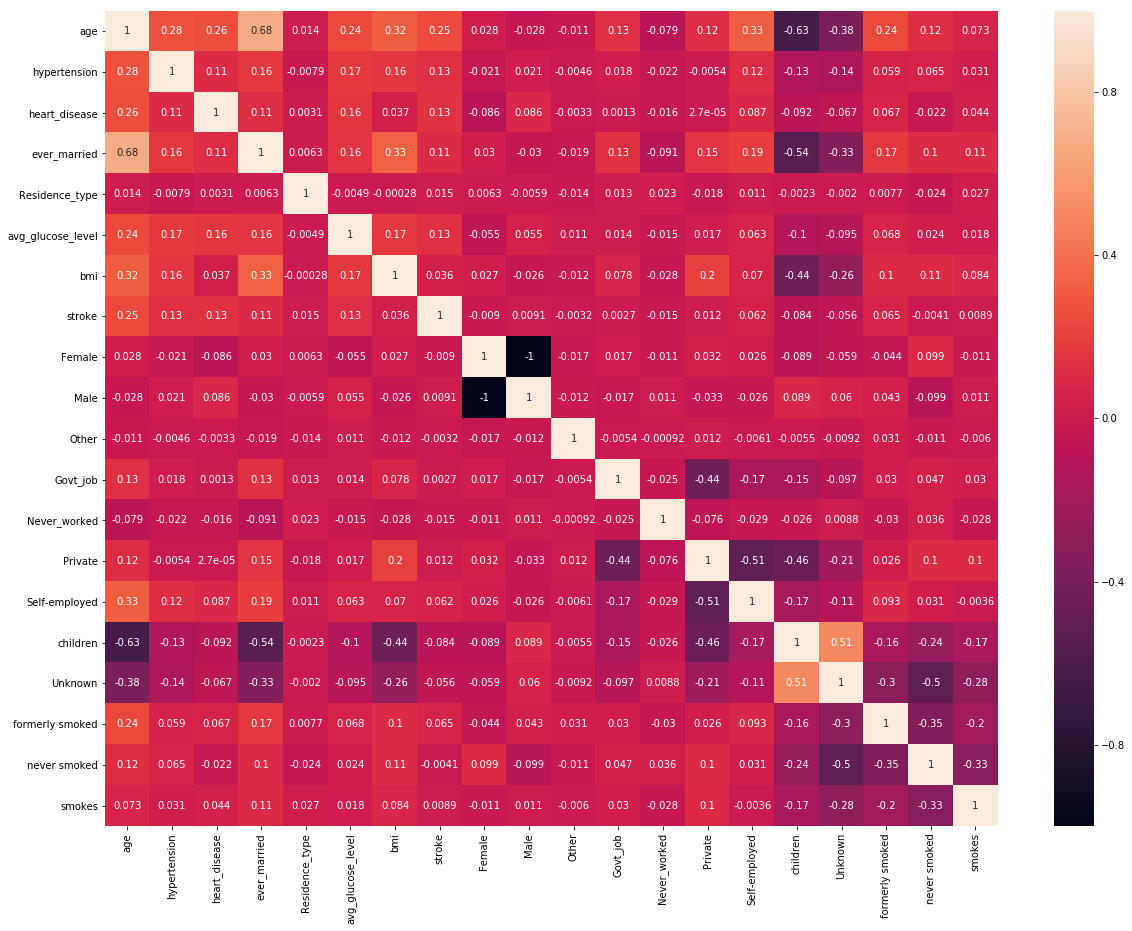

In [62]:
plt.figure(figsize=(20,15))
sns.heatmap(stroke.corr(),annot=True)
plt.show()

> Strong correlation between some of variables most notably 'Age' and 'Ever Married' which is to be expected but not correlated strongly enough for us to remove one of the variables. In addition a stroke is correlated with 'age', 'hypertension', 'heart disease' and 'average glucose level'.

In [63]:
def plotting_function(x,y,data=stroke,plot_type='bar'):
    plt.figure(figsize=(10,5))
    if plot_type == 'bar':
        sns.barplot(x=x,y=y,data=data)
        plt.show()
    elif plot_type =='scatter': 
        sns.scatterplot(x=x,y=y, data=data,alpha=.5)
        plt.show()
    

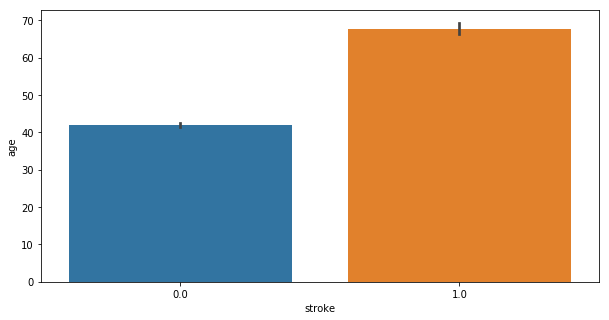

In [64]:
plotting_function(x='stroke',y='age')

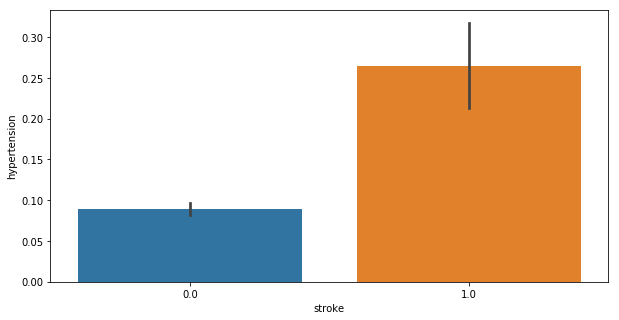

In [65]:
plotting_function(x='stroke',y='hypertension')

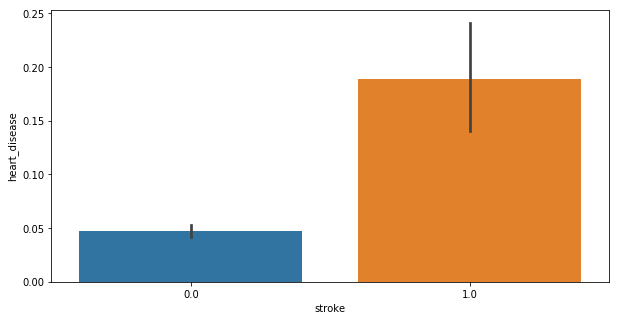

In [66]:
plotting_function(x='stroke',y='heart_disease')

> After examining the percentage of people with heart disWill be important to include these variables in our model as they are strong predictors of stroke

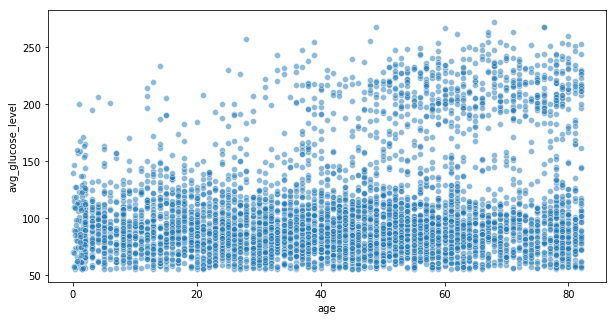

In [67]:
plotting_function(x='age',y='avg_glucose_level', plot_type='scatter')

Text(0.5, 1.0, 'Age of Married vs. Not Married')

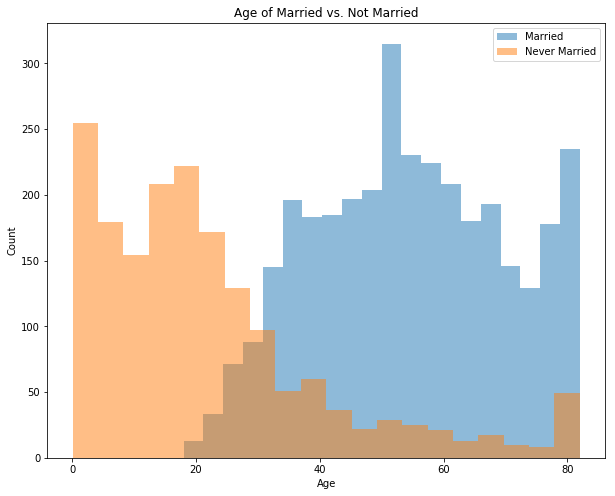

In [68]:
#create two dataframes for married vs. not married
married = stroke[stroke['ever_married'] == 1]
not_married = stroke[stroke['ever_married'] == 0]
#create histogram for ages of individuals married vs. not married to see if its worth including both
plt.figure(figsize=(10,8))
plt.hist(married['age'], bins=20, alpha=0.5, label="Married")
plt.hist(not_married['age'], bins=20, alpha=0.5, label="Never Married")

plt.xlabel('Age') 
plt.ylabel('Count')
plt.legend(loc='upper right')
plt.title('Age of Married vs. Not Married')

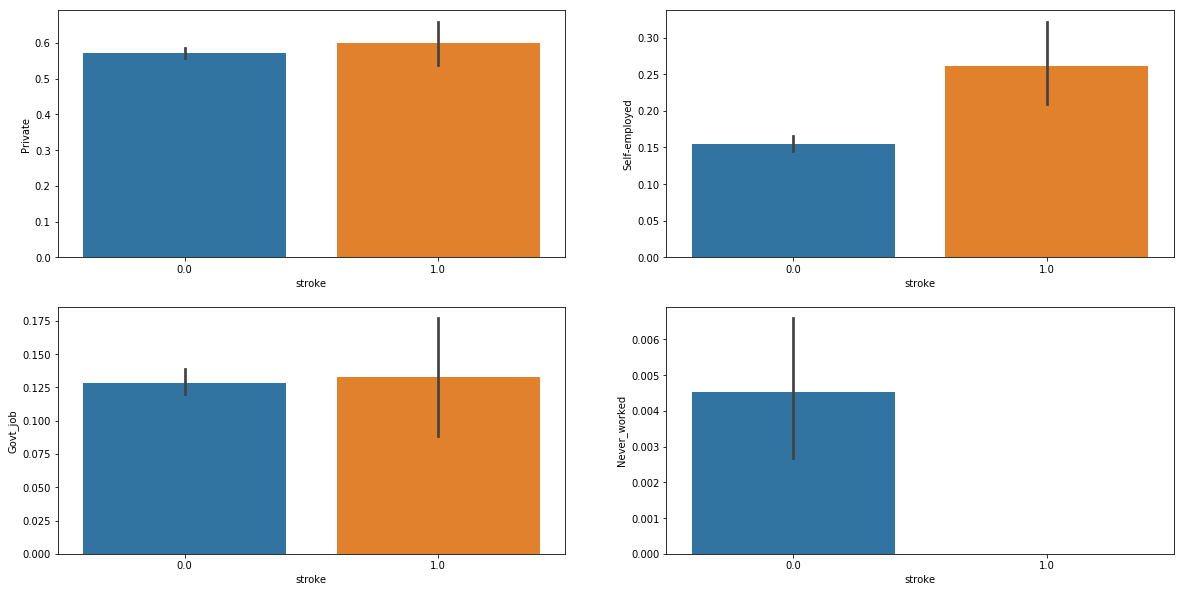

In [69]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.barplot(x='stroke',y='Private',data=stroke)
plt.subplot(2,2,2)
sns.barplot(x='stroke',y='Self-employed',data=stroke)
plt.subplot(2,2,3)
sns.barplot(x='stroke',y='Govt_job',data=stroke)
plt.subplot(2,2,4)
sns.barplot(x='stroke',y='Never_worked',data=stroke)
plt.show()

In [70]:
#check the value counts of our target variable, might try and upsample the target class if the accuracy of our initial models aren't good or use a model that works well with minimal number of samples
stroke['stroke'].value_counts()

0.0    4861
1.0     249
Name: stroke, dtype: int64

#### Preprocessing and Modeling

In [71]:
#setup and split our features from our target variable
y = stroke['stroke']
stroke.drop('stroke', axis=1, inplace=True)
X = stroke

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, scale

In [73]:
X.head()

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,Female,Male,Other,Govt_job,Never_worked,Private,Self-employed,children,Unknown,formerly smoked,never smoked,smokes
0,67.0,0.0,1.0,1.0,1.0,228.69,36.6,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,61.0,0.0,0.0,1.0,0.0,202.21,28.1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,80.0,0.0,1.0,1.0,0.0,105.92,32.5,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,49.0,0.0,0.0,1.0,1.0,171.23,34.4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,79.0,1.0,0.0,1.0,0.0,174.12,24.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [34]:
# X_numerical = X[['age','avg_glucose_level','bmi']]
# X.drop(['age','avg_glucose_level','bmi'],axis=1,inplace=True) 
# X_categorical = X

KeyError: "None of [Index(['age', 'avg_glucose_level', 'bmi'], dtype='object')] are in the [columns]"

In [74]:
#For SVM we need all the variables to have zero mean and unit variance so feed features through Standard Scaler
cols = X.columns
scale = StandardScaler()
X_scaled = scale.fit_transform(X)

In [75]:
X_scaled_df = pd.DataFrame(X_scaled, columns = cols )

In [76]:
X_scaled_df.head()

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,Female,Male,Other,Govt_job,Never_worked,Private,Self-employed,children,Unknown,formerly smoked,never smoked,smokes
0,1.051434,-0.328602,4.185032,0.723884,0.984080,2.706375,1.005086,-1.189510,1.189990,-0.01399,-0.384111,-0.065756,0.864297,-0.436881,-0.394112,-0.658011,2.184951,-0.766774,-0.427313
1,0.786070,-0.328602,-0.238947,0.723884,-1.016178,2.121559,-0.098981,0.840682,-0.840343,-0.01399,-0.384111,-0.065756,-1.157010,2.288955,-0.394112,-0.658011,-0.457676,1.304165,-0.427313
2,1.626390,-0.328602,4.185032,0.723884,-1.016178,-0.005028,0.472536,-1.189510,1.189990,-0.01399,-0.384111,-0.065756,0.864297,-0.436881,-0.394112,-0.658011,-0.457676,1.304165,-0.427313
3,0.255342,-0.328602,-0.238947,0.723884,0.984080,1.437358,0.719327,0.840682,-0.840343,-0.01399,-0.384111,-0.065756,0.864297,-0.436881,-0.394112,-0.658011,-0.457676,-0.766774,2.340204
4,1.582163,3.043196,-0.238947,0.723884,-1.016178,1.501184,-0.631531,0.840682,-0.840343,-0.01399,-0.384111,-0.065756,-1.157010,2.288955,-0.394112,-0.658011,-0.457676,1.304165,-0.427313


In [77]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled_df,y,test_size=0.20,random_state=70)  

In [105]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,f1_score,recall_score,roc_curve,roc_auc_score

In [107]:
svm_model = SVC(random_state=100,class_weight='balanced')

params = {'C':[0.01,0.1,1,10,100,1000,10000],
          'gamma':[10,1,0.1,0.001,0.0001,0.00001]}

grid_search = GridSearchCV(estimator=svm_model,param_grid=params,verbose=1,n_jobs=-1,scoring='f1')
grid_search.fit(x_train,y_train)

Fitting 3 folds for each of 42 candidates, totalling 126 fits


/Users/AlexGaujean/anaconda3/envs/new_python/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   23.3s
[Parallel(n_jobs=-1)]: Done 126 out of 126 | elapsed:   41.6s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=100,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000, 10000], 'gamma': [10, 1, 0.1, 0.001, 0.0001, 1e-05]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=1)

In [108]:
svm_model = grid_search.best_estimator_

In [149]:
#the recall and accuracy score on the training set
y_train_pred = svm_model.predict(x_train)
train_f1 = f1_score(y_train,y_train_pred)
train_recall = recall_score(y_train,y_train_pred)
train_accuracy = accuracy_score(y_train,y_train_pred)

In [177]:
#the recall and accuracy on the test set
y_test_pred = svm_model.predict(x_test)
test_f1 = f1_score(y_test,y_test_pred)
test_recall = recall_score(y_test,y_test_pred)
test_accuracy = accuracy_score(y_test,y_test_pred)

In [245]:
def plot_model_metrics(f1_train,f1_test,recall_train,recall_test,accuracy_train,accuracy_test,title='Model Metrics'):
    x=[0,1,2,3,4,5]
    y = [f1_train,f1_test,recall_train,recall_test,accuracy_train,accuracy_test]
    plt.figure(figsize=(8,6))
    ax = plt.subplot()
    plt.bar(x=x,height=y,width=.8)
    plt.xticks(rotation=30)
    plt.ylabel('Score')
    plt.xlabel('Metric')
    ax.set_xticks([0,1,2,3,4,5])
    ax.set_ylim([0,1])
    ax.set_xticklabels(['f1_train','f1_test','recall_train','recall_test','accuracy_train','accuracy_test'])
    for i, v in enumerate(y):
        ax.text(i-.20,v +.03, str(round(v,3)), color='black', fontweight='bold')
    plt.title(title)
    plt.show()


In [251]:
def plot_roc_auc(fpr,tpr,auc,title): 
    plt.figure(figsize=(8,6))
    lw = 2
    plt.plot(
        fpr,
        tpr,
        color="darkorange",
        lw=lw,
        label="ROC curve (auc = %0.2f)" % auc,
    )
    plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

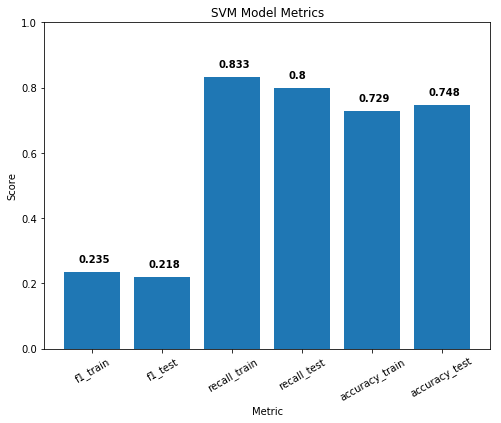

In [248]:
plot_model_metrics(train_f1,test_f1,train_recall,test_recall,train_accuracy,test_accuracy,title='SVM Model Metrics')

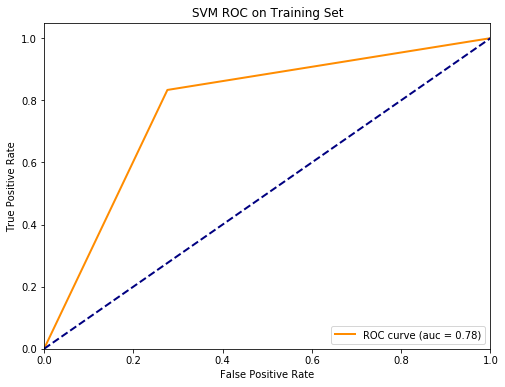

In [255]:
fpr,tpr,thresholds = roc_curve(y_train,y_train_pred)
auc = roc_auc_score(y_train,y_train_pred)
plot_roc_auc(fpr,tpr,auc,title='SVM ROC on Training Set')

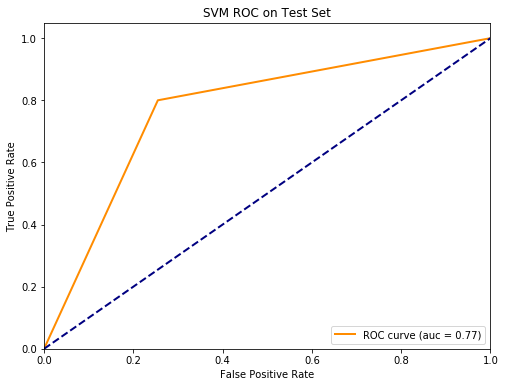

In [256]:
fpr_test,tpr_test,thresholds = roc_curve(y_test,y_test_pred)
auc = roc_auc_score(y_test,y_test_pred)
plot_roc_auc(fpr_test,tpr_test,auc,title='SVM ROC on Test Set')

> This SVM model had better recall than accuracy which would be important for this type of test, and the model generalized well to new samples performing about equal when shown and asked to classify the test set. The AUC of the train and test set are almost identical. Overall this model performed well but not perfect, will try additional classifier models like XGBoost or Random Forest Classifier as well and see how it compares. Unable to explore the most important features contributing to model classification because the SVM Radial kernel was used. 